In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import datetime

import talib as ta
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
# Importing libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from  sklearn.ensemble import GradientBoostingClassifier
import multiprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,precision_score,recall_score

In [2]:
NewDF = pd.read_csv("C:\\Users\\marli\\Downloads\\FinalAnalysisMin2.csv")
NewDF.head(1)

,Unnamed: 0,Symbol,Name,Market Cap,Country,Sector,Industry,XGB StragyReturn,XGB recall -1,XGB recall 0,...,KNN precision 1,KNN accuracy,Stacking StragyReturn,Stacking recall -1,Stacking recall 0,Stacking recall 1,Stacking precision -1,Stacking precision 0,Stacking precision 1,Stacking accuracy
0,0,A,Agilent Technologies Inc. Common Stock,4.973733e+10,United States,Capital Goods,Electrical Products,-0.000036,0.331081,0.543011,...,0.398964,0.347826,3.794649e-07,0.527027,0.580645,0.580645,0.366197,0.465517,0.465517,0.418972


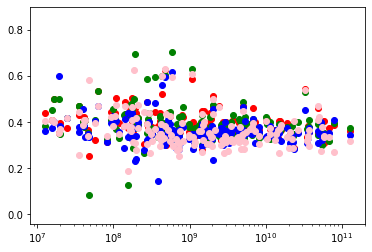

In [3]:
X = NewDF["Market Cap"]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X,NewDF["XGB accuracy"],color="r")
plt.scatter(X,NewDF["RandomForest accuracy"],color="g")
plt.scatter(X,NewDF["KNN accuracy"],color="b")
plt.scatter(X,NewDF["Stacking accuracy"],color="pink")
ax.set_xscale('log')

array([[<AxesSubplot:title={'center':'XGB accuracy'}>,
        <AxesSubplot:title={'center':'RandomForest accuracy'}>],
       [<AxesSubplot:title={'center':'KNN accuracy'}>,
        <AxesSubplot:title={'center':'Stacking accuracy'}>]], dtype=object)

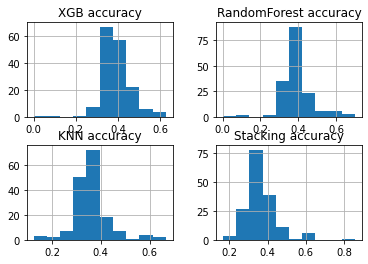

In [10]:
NewDF[["XGB accuracy","RandomForest accuracy","KNN accuracy","Stacking accuracy"]].hist()

In [111]:
#"XGB accuracy","RandomForest accuracy","KNN accuracy","Stacking accuracy"
NewDF['Signal'] = 0
NewDF.loc[NewDF['XGB accuracy'] > NewDF['XGB accuracy'].quantile(q=0.66), 'Signal'] = -1
NewDF.loc[NewDF['XGB accuracy'] < NewDF['XGB accuracy'].quantile(q=0.33), 'Signal'] = 1
X = NewDF[["Country","Market Cap","Sector","Industry"]]
Y = NewDF["Signal"]

In [117]:
X_Train, X_Test, Y_Train, Y_Test = \
    train_test_split(X, Y, test_size=0.2, random_state=1)

In [115]:
preprocessor = ColumnTransformer(
    transformers=[
        ("Num",StandardScaler(), ["Market Cap"]),
        ("Cat",OneHotEncoder(handle_unknown="ignore"), ["Country","Sector","Industry"]),
    ]
)

105    0.401015
42     0.373606
145    0.403226
51     0.351474
92     0.512953
         ...   
133    0.440000
137    0.505155
72     0.373206
140    0.339367
37     0.363636
Name: XGB accuracy, Length: 132, dtype: float64

In [118]:
KNN = KNeighborsClassifier(n_neighbors=20)
steps = [('Transform', preprocessor) , ('Model', KNN)]
pipeline = Pipeline(steps)
pipeline.fit(X_Train, Y_Train)

predictions = pipeline.predict(X_Test)
accuracy_score(Y_Test, predictions)

0.23529411764705882